In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [7]:
import seaborn as sns
sns.set_theme()

In [152]:
from typing import List
# https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
# Tensorboard implementation for ema smoothing
def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

In [11]:
data = pickle.load( open( "data_df.p", "rb" ) )

In [16]:
data.columns

Index(['idx', 'step', 'value', 'epoch', 'time', 'run.hash', 'run.bs',
       'run.epochs', 'run.eval_each_n_epochs_after_150_epochs',
       'run.eval_each_n_epochs', 'run.eval_mode', 'run.experiment',
       'run.freeze_encoder', 'run.img_size', 'run.load_checkpoint', 'run.loss',
       'run.lr', 'run.model_type', 'run.simulate_smaller_dataset',
       'metric.name', 'metric.context.gpu', 'metric.context'],
      dtype='object')

In [26]:
checkpoints

array([None, 'maecheckpoints/mae_seq1_crop128_checkpoint-40.pth',
       'maecheckpoints/mae_seq1_crop128_checkpoint-30.pth',
       'maecheckpoints/mae_seq1_crop128_checkpoint-20.pth',
       'maecheckpoints/mae_seq1_crop128_checkpoint-50.pth',
       'maecheckpoints/mae_seq1_crop128_checkpoint-10.pth'], dtype=object)

In [58]:
from collections import defaultdict

### Aggregate some run information into dicts

In [80]:
runs = {}
runs_info = defaultdict(dict)
for run_hash in data["run.hash"].unique():
    
    run_subset = data[data["run.hash"] == run_hash]
    
    runs[run_hash] = run_subset[run_subset["run.hash"] == run_hash]
    
    runs_info[run_hash]["simulate_smaller_dataset"] = run_subset.iloc[0]["run.simulate_smaller_dataset"]
    runs_info[run_hash]["model_type"] = run_subset.iloc[0]["run.model_type"]
    runs_info[run_hash]["load_checkpoint"] = run_subset.iloc[0]["run.load_checkpoint"]
    runs_info[run_hash]["freeze_encoder"] = run_subset.iloc[0]["run.freeze_encoder"]

In [166]:
small_runs = [run for run in runs.keys() if runs_info[run]["simulate_smaller_dataset"] == 0.1]
big_runs = [run for run in runs.keys() if runs_info[run]["simulate_smaller_dataset"] == 1.0]

In [167]:
point2runs = [run for run in runs.keys() if runs_info[run]["simulate_smaller_dataset"] == 0.2]
point5runs = [run for run in runs.keys() if runs_info[run]["simulate_smaller_dataset"] == 0.5]

### Raw Plot construction

Text(0, 0.5, 'Validation loss')

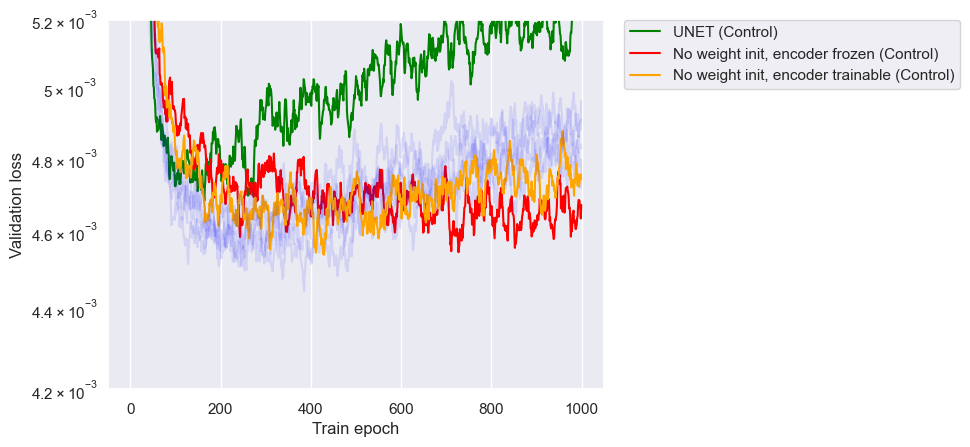

In [168]:
for run_hash in small_runs:
    subset = data[data["run.hash"] == run_hash]
    
    sorted_val_loss = subset[subset["metric.name"] == "val_loss"].sort_values("step")["value"]
    
    if "UNETR" == runs_info[run_hash]["model_type"]:
        
        if runs_info[run_hash]["load_checkpoint"] is None:
            
            if runs_info[run_hash]["freeze_encoder"]:
                label = "No weight init, encoder frozen (Control)"
                alpha = 1
                col = "red"
                linestyle = "solid"
            else:
                label = "No weight init, encoder trainable (Control)"
                alpha = 1
                col = "orange"
                linestyle = "solid"
            
        else:
            label = None
            alpha = 0.1
            col = "blue"
            linestyle = "solid"
    else:
        label = "UNET (Control)"
        alpha = 1.0
        col = "green"
        linestyle = "solid"
    
    plt.plot(smooth(sorted_val_loss, 0.9), label=label, c=col, alpha=alpha, linestyle=linestyle)

plt.yscale("log")
plt.ylim(4.2e-3, 5.2e-3)
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)

plt.xlabel("Train epoch")
plt.ylabel("Validation loss")

Text(0, 0.5, 'Validation loss')

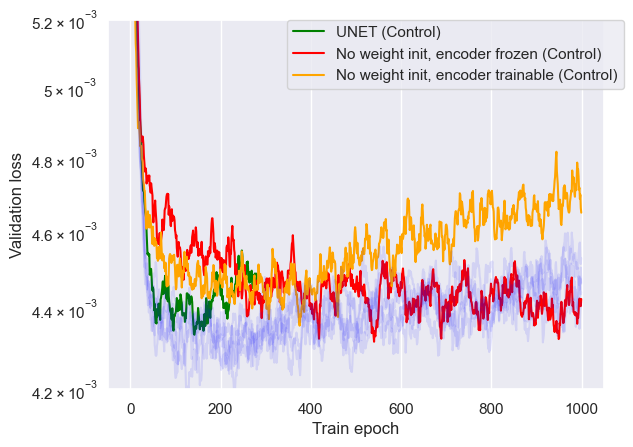

In [169]:
for run_hash in big_runs:
    subset = data[data["run.hash"] == run_hash]
    
    sorted_val_loss = subset[subset["metric.name"] == "val_loss"].sort_values("step")["value"]
    
    if "UNETR" == runs_info[run_hash]["model_type"]:
        
        if runs_info[run_hash]["load_checkpoint"] is None:
            
            if runs_info[run_hash]["freeze_encoder"]:
                label = "No weight init, encoder frozen (Control)"
                alpha = 1
                col = "red"
                linestyle = "solid"
            else:
                label = "No weight init, encoder trainable (Control)"
                alpha = 1
                col = "orange"
                linestyle = "solid"
            
        else:
            label = None
            alpha = 0.1
            col = "blue"
            linestyle = "solid"
    else:
        label = "UNET (Control)"
        alpha = 1.0
        col = "green"
        linestyle = "solid"
    
    plt.plot(smooth(sorted_val_loss, 0.9), label=label, c=col, alpha=alpha, linestyle=linestyle)

plt.yscale("log")
plt.ylim(4.2e-3, 5.2e-3)
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)

plt.xlabel("Train epoch")
plt.ylabel("Validation loss")

## Labelscale: Small vs Big

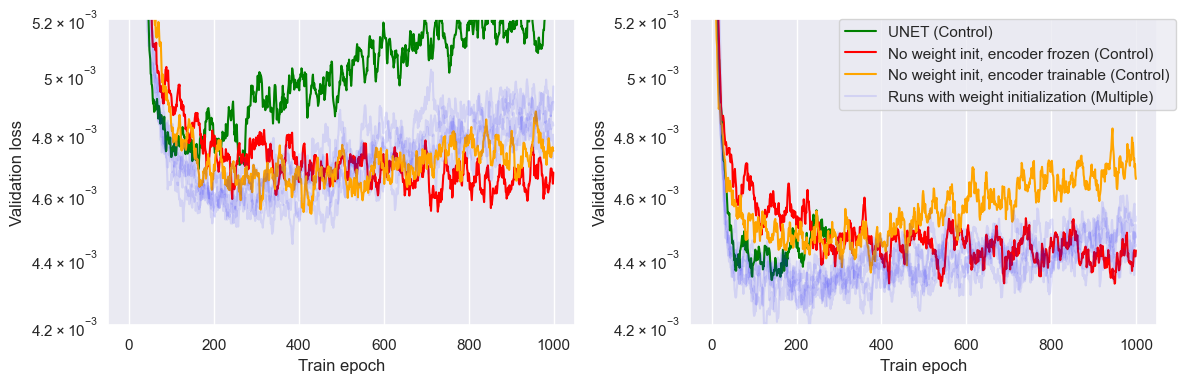

In [170]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

for run_hash in small_runs:
    subset = data[data["run.hash"] == run_hash]
    
    sorted_val_loss = subset[subset["metric.name"] == "val_loss"].sort_values("step")["value"]
    
    if "UNETR" == runs_info[run_hash]["model_type"]:
        
        if runs_info[run_hash]["load_checkpoint"] is None:
            
            if runs_info[run_hash]["freeze_encoder"]:
                label = "No weight init, encoder frozen (Control)"
                alpha = 1
                col = "red"
                linestyle = "solid"
            else:
                label = "No weight init, encoder trainable (Control)"
                alpha = 1
                col = "orange"
                linestyle = "solid"
            
        else:
            label = None
            alpha = 0.1
            col = "blue"
            linestyle = "solid"
    else:
        label = "UNET (Control)"
        alpha = 1.0
        col = "green"
        linestyle = "solid"
    
    ax.flat[0].plot(smooth(sorted_val_loss, 0.9), label=label, c=col, alpha=alpha, linestyle=linestyle)

ax.flat[0].set_yscale("log")
ax.flat[0].set_ylim(4.2e-3, 5.2e-3)

ax.flat[0].set_xlabel("Train epoch")
ax.flat[0].set_ylabel("Validation loss")

first_label = True
for run_hash in big_runs:
    subset = data[data["run.hash"] == run_hash]
    
    sorted_val_loss = subset[subset["metric.name"] == "val_loss"].sort_values("step")["value"]
    
    if "UNETR" == runs_info[run_hash]["model_type"]:
        
        if runs_info[run_hash]["load_checkpoint"] is None:
            
            if runs_info[run_hash]["freeze_encoder"]:
                label = "No weight init, encoder frozen (Control)"
                alpha = 1
                col = "red"
                linestyle = "solid"
            else:
                label = "No weight init, encoder trainable (Control)"
                alpha = 1
                col = "orange"
                linestyle = "solid"
            
        else:
            label = None
            if first_label:
                label = "Runs with weight initialization (Multiple)"
                first_label = False
            alpha = 0.1
            col = "blue"
            linestyle = "solid"
    else:
        label = "UNET (Control)"
        alpha = 1.0
        col = "green"
        linestyle = "solid"
    
    ax.flat[1].plot(smooth(sorted_val_loss, 0.9), label=label, c=col, alpha=alpha, linestyle=linestyle)

ax.flat[1].set_yscale("log")
ax.flat[1].set_ylim(4.2e-3, 5.2e-3)
ax.flat[1].legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)

ax.flat[1].set_xlabel("Train epoch")
ax.flat[1].set_ylabel("Validation loss")

plt.tight_layout()
plt.savefig("smallvsbig.pdf")

## Labelscale: All four

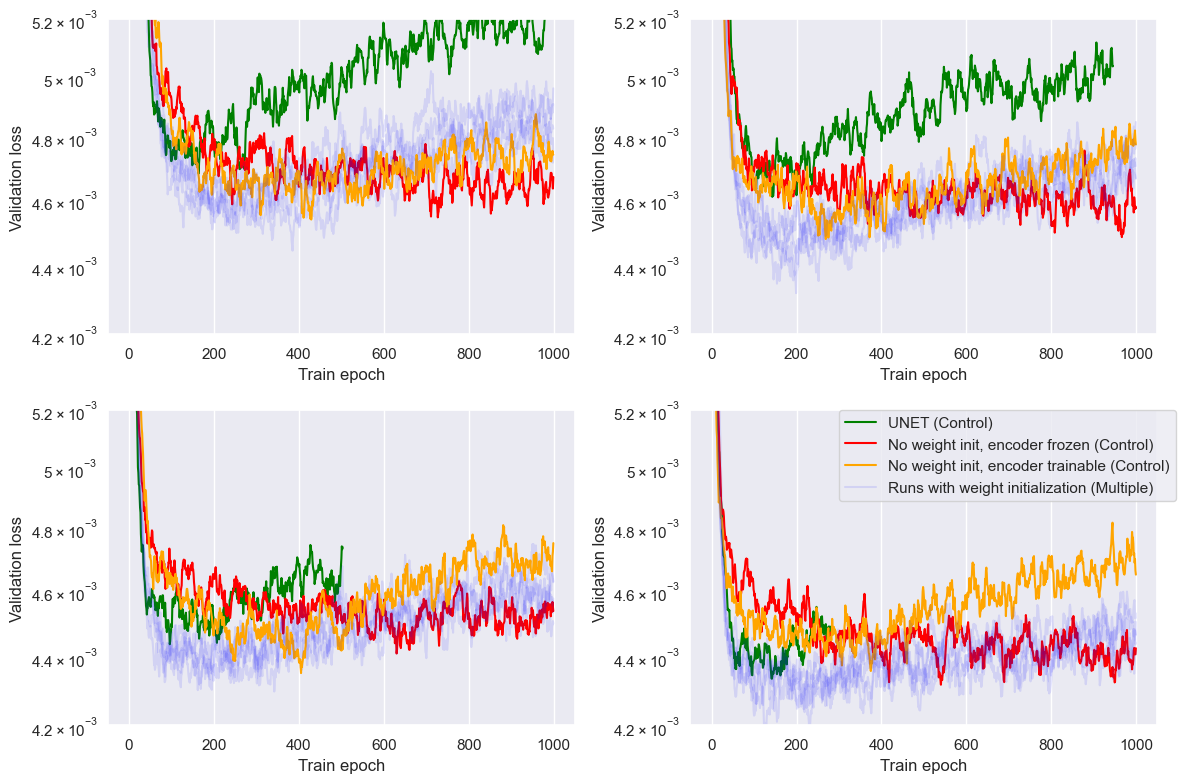

In [171]:
fig, ax = plt.subplots(2,2, figsize=(12,8))

for run_hash in small_runs:
    subset = data[data["run.hash"] == run_hash]
    
    sorted_val_loss = subset[subset["metric.name"] == "val_loss"].sort_values("step")["value"]
    
    if "UNETR" == runs_info[run_hash]["model_type"]:
        
        if runs_info[run_hash]["load_checkpoint"] is None:
            
            if runs_info[run_hash]["freeze_encoder"]:
                label = "No weight init, encoder frozen (Control)"
                alpha = 1
                col = "red"
                linestyle = "solid"
            else:
                label = "No weight init, encoder trainable (Control)"
                alpha = 1
                col = "orange"
                linestyle = "solid"
            
        else:
            label = None
            alpha = 0.1
            col = "blue"
            linestyle = "solid"
    else:
        label = "UNET (Control)"
        alpha = 1.0
        col = "green"
        linestyle = "solid"
    
    ax.flat[0].plot(smooth(sorted_val_loss, 0.9), label=label, c=col, alpha=alpha, linestyle=linestyle)

ax.flat[0].set_yscale("log")
ax.flat[0].set_ylim(4.2e-3, 5.2e-3)

ax.flat[0].set_xlabel("Train epoch")
ax.flat[0].set_ylabel("Validation loss")

for run_hash in point2runs:
    subset = data[data["run.hash"] == run_hash]
    
    sorted_val_loss = subset[subset["metric.name"] == "val_loss"].sort_values("step")["value"]
    
    if "UNETR" == runs_info[run_hash]["model_type"]:
        
        if runs_info[run_hash]["load_checkpoint"] is None:
            
            if runs_info[run_hash]["freeze_encoder"]:
                label = "No weight init, encoder frozen (Control)"
                alpha = 1
                col = "red"
                linestyle = "solid"
            else:
                label = "No weight init, encoder trainable (Control)"
                alpha = 1
                col = "orange"
                linestyle = "solid"
            
        else:
            label = None
            alpha = 0.1
            col = "blue"
            linestyle = "solid"
    else:
        label = "UNET (Control)"
        alpha = 1.0
        col = "green"
        linestyle = "solid"
    
    ax.flat[1].plot(smooth(sorted_val_loss, 0.9), label=label, c=col, alpha=alpha, linestyle=linestyle)

ax.flat[1].set_yscale("log")
ax.flat[1].set_ylim(4.2e-3, 5.2e-3)

ax.flat[1].set_xlabel("Train epoch")
ax.flat[1].set_ylabel("Validation loss")

for run_hash in point5runs:
    subset = data[data["run.hash"] == run_hash]
    
    sorted_val_loss = subset[subset["metric.name"] == "val_loss"].sort_values("step")["value"]
    
    if "UNETR" == runs_info[run_hash]["model_type"]:
        
        if runs_info[run_hash]["load_checkpoint"] is None:
            
            if runs_info[run_hash]["freeze_encoder"]:
                label = "No weight init, encoder frozen (Control)"
                alpha = 1
                col = "red"
                linestyle = "solid"
            else:
                label = "No weight init, encoder trainable (Control)"
                alpha = 1
                col = "orange"
                linestyle = "solid"
            
        else:
            label = None
            alpha = 0.1
            col = "blue"
            linestyle = "solid"
    else:
        label = "UNET (Control)"
        alpha = 1.0
        col = "green"
        linestyle = "solid"
    
    ax.flat[2].plot(smooth(sorted_val_loss, 0.9), label=label, c=col, alpha=alpha, linestyle=linestyle)

ax.flat[2].set_yscale("log")
ax.flat[2].set_ylim(4.2e-3, 5.2e-3)

ax.flat[2].set_xlabel("Train epoch")
ax.flat[2].set_ylabel("Validation loss")

first_label = True
for run_hash in big_runs:
    subset = data[data["run.hash"] == run_hash]
    
    sorted_val_loss = subset[subset["metric.name"] == "val_loss"].sort_values("step")["value"]
    
    if "UNETR" == runs_info[run_hash]["model_type"]:
        
        if runs_info[run_hash]["load_checkpoint"] is None:
            
            if runs_info[run_hash]["freeze_encoder"]:
                label = "No weight init, encoder frozen (Control)"
                alpha = 1
                col = "red"
                linestyle = "solid"
            else:
                label = "No weight init, encoder trainable (Control)"
                alpha = 1
                col = "orange"
                linestyle = "solid"
            
        else:
            label = None
            if first_label:
                label = "Runs with weight initialization (Multiple)"
                first_label = False
            alpha = 0.1
            col = "blue"
            linestyle = "solid"
    else:
        label = "UNET (Control)"
        alpha = 1.0
        col = "green"
        linestyle = "solid"
    
    ax.flat[3].plot(smooth(sorted_val_loss, 0.9), label=label, c=col, alpha=alpha, linestyle=linestyle)

ax.flat[3].set_yscale("log")
ax.flat[3].set_ylim(4.2e-3, 5.2e-3)
ax.flat[3].legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)

ax.flat[3].set_xlabel("Train epoch")
ax.flat[3].set_ylabel("Validation loss")

plt.tight_layout()

plt.savefig("allfour.pdf")